In [190]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

df = pd.read_csv("goodone.csv")

In [191]:
#remplacing None to work easily with empty data
df.replace(to_replace="None", value=np.nan, inplace=True)
print(df.shape)
df.head()

(59550, 16)


,locality,Price,Type_property,Sale_type,Number_bedrooms,Living_area,fully_equipped_kitchen,Furnished,terrace,garden,surface_land,surface_area_plot,facades_number,Swimming_pool,building_state,fire_place
0,6800,145500,apartment,for-sale,1,40,1,0,8,NaN,40,NaN,NaN,0,Good,NaN
1,6980,185000,mixed-use-building,for-sale,4,226,1,NaN,NaN,NaN,226,100,3,0,To be done up,NaN
2,6960,228000,apartment,for-sale,4,290,0,0,NaN,300,290,NaN,4,NaN,To renovate,NaN
3,6880,249500,house,for-sale,3,176,1,0,18,620,176,620,3,0,As new,NaN
4,6870,295000,house,for-sale,6,229,1,0,NaN,NaN,229,5798,4,0,To renovate,NaN


## Step 1 : Data Cleaning

In [192]:
#knowing how many were missing 
df['Price'].isna().sum() #there's no missing prices 
df['Living_area'].isna().sum() #there's 9964
df['locality'].isna().sum() #there's none
df['Type_property'].isna().sum()#none
df['Sale_type'].isna().sum()#none
df['building_state'].isna().sum() #18586
df['facades_number'].isna().sum() #16498
df['surface_land'].isna().sum() #1091

#get rid of empty lines of information 
df.dropna(subset=['Living_area', 'facades_number','building_state','surface_land' ], inplace=True)
df.shape

#get rid of collumns that I don't need
df.drop("fully_equipped_kitchen", inplace=True, axis=1)
df.drop("fire_place", inplace=True,axis=1)
df.drop("Furnished", inplace=True, axis=1)
df.drop("surface_area_plot", inplace=True,axis=1)
#get rid of terrace and swimming pool for now
df.drop("terrace", inplace=True,axis=1)
df.drop("Swimming_pool", inplace=True,axis=1)

#replace Nan garden into 0
df['garden'].fillna(0, inplace=True)
df.reset_index(inplace=True)

#creation of a garden bool column to know i there's a garden or not
df['garden'] = pd.to_numeric(df['garden'])
df['garden_bool'] = df['garden']
df.loc[(df.garden_bool == 0),'garden_bool']= False
df.loc[(df.garden_bool > 0),'garden_bool']= True

#reduction of the maximum of the price
#df.drop(df[df['Price'] > 1000000].index, inplace = True)
#modifying the types of the columns
df['garden_bool'] = df['garden_bool'].astype('string')
df['Type_property'] = df['Type_property'].astype('string')
df['Sale_type'] = df['Sale_type'].astype('string')
df['building_state'] = df['building_state'].astype('string')

df['Number_bedrooms'] = pd.to_numeric(df['Number_bedrooms'])
df['Living_area'] = pd.to_numeric(df['Living_area'])
df['surface_land'] = pd.to_numeric(df['surface_land'])
df['garden'] = pd.to_numeric(df['garden'])
df['surface_land'] = pd.to_numeric(df['surface_land'])
df['facades_number'] = pd.to_numeric(df['facades_number'])
df["provinces"] = df["locality"]

#new column named m2price 
df['m2price'] = (df['Price']/df['Living_area']).round()

#creating a province column
df['provinces'] = np.where(df['locality'].between(1000,1299), "Brussel", df['provinces'])
df['provinces'] = np.where(df['locality'].between(6600,6999), "Luxembourg", df['provinces'])
df['provinces'] = np.where(df['locality'].between(2000,2999), "Anvers", df['provinces'])
df['provinces'] = np.where(df['locality'].between(1300,1499), "W.brabant", df['provinces'])
df['provinces'] = np.where(df['locality'].between(7000,7999), "Hainaut", df['provinces'])
df['provinces'] = np.where(df['locality'].between(6000,6599), "Hainaut", df['provinces'])

df['provinces'] = np.where(df['locality'].between(3500,3999), "Limbourg", df['provinces'])
df['provinces'] = np.where(df['locality'].between(5000,5680), "Namur", df['provinces'])
df['provinces'] = np.where(df['locality'].between(9000,9999), "E.Fanders", df['provinces'])
df['provinces'] = np.where(df['locality'].between(1500,1999), "F.Brabant", df['provinces'])
df['provinces'] = np.where(df['locality'].between(3000,3499), "F.Brabant", df['provinces'])

df['provinces'] = np.where(df['locality'].between(8000,8999), "W.Flanders", df['provinces'])
df['provinces'] = np.where(df['locality'].between(4000,4999), "Liege", df['provinces'])

#reduction of the maximum of the price
d_big = df
df.shape

(28302, 14)

In [193]:
#emoving outliers from prices  
p25 = df['Price'].quantile(0.25)
p75 = df['Price'].quantile(0.75)
iqr = p75-p25
upper_limit = p75 + 1.5 * iqr
lower_limit = p25 - 1.5 * iqr
df= df.drop(df[df['Price'] > upper_limit].index)
print(df.shape)
#removing outliers from garden 
p25 = df['garden'].quantile(0.25)
p75 = df['garden'].quantile(0.75)
iqr = p75-p25
upper_limit = p75 + 1.5 * iqr
lower_limit = p25 - 1.5 * iqr
df= df.drop(df[df['garden'] > upper_limit].index)
print(df.shape)
#removing outliers from living area
p25 = df['Living_area'].quantile(0.25)
p75 = df['Living_area'].quantile(0.75)
iqr = p75-p25
upper_limit = p75 + 1.5 * iqr
lower_limit = p25 - 1.5 * iqr
df= df.drop(df[df['Living_area'] > upper_limit].index)
print(df.shape)


(25966, 14)
(20877, 14)
(19950, 14)


In [194]:
df["med_loc"] = df.groupby('locality',sort=False)['Price'].transform('median')
df["avg_loc"] = df.groupby('locality',sort=False)['Price'].transform('mean')
df["m2"] = df.groupby('locality',sort=False)['m2price'].transform('median')

df
test = pd.DataFrame()
test["med_loc"] = df['med_loc']
test["avg_loc"] = df['med_loc']
test["locality"] = df['locality']
test["m2"] = df['m2']
test.head()


,med_loc,avg_loc,locality,m2
0,185000.0,185000.0,6980,1539.5
3,189000.0,189000.0,6870,1107.0
10,199500.0,199500.0,6800,2040.5
11,284000.0,284000.0,9300,2114.0
14,190000.0,190000.0,6061,1274.0


## Step 2 : Data Analysis

C:\Users\feldm\AppData\Local\Temp\ipykernel_27460\3565973052.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = d_big.corr()


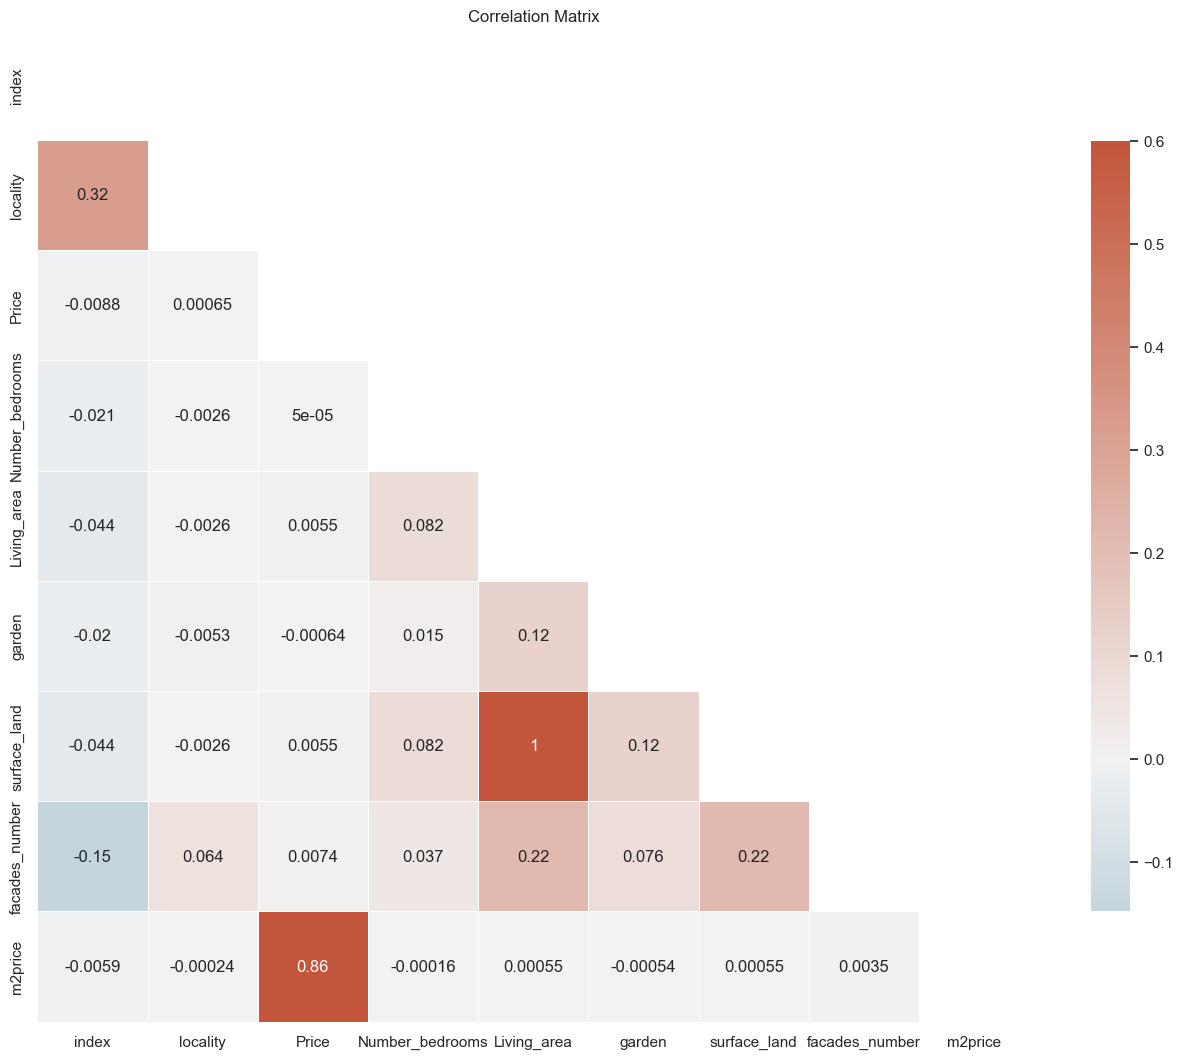

In [213]:
sns.set_theme(style="white")
# Compute the correlation matrix
corr = d_big.corr()
#Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# # Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 20))
# # Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# # Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=.6, center=0,
             square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Correlation Matrix")

plt.show()


(19950, 17)


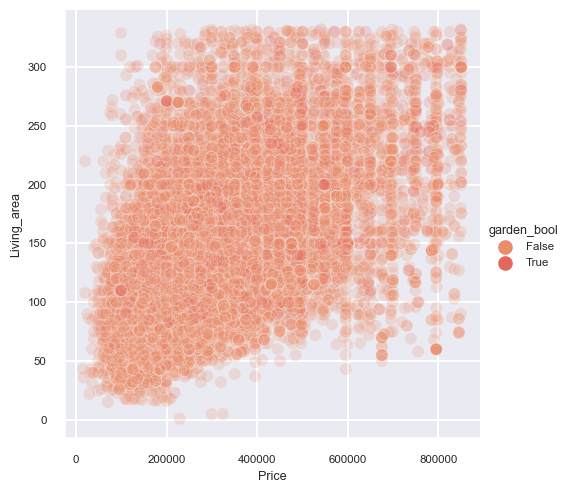

In [212]:


# How many rows and columns?
print(df.shape)
# What is the correlation between the variables and the price? (Why might that be?)
sns.set_style('darkgrid')
sns.set_context('talk', font_scale=0.5)
sns.relplot(data=df,x="Price",y="Living_area",hue="garden_bool",alpha=0.2)
#sns.lmplot(data=df,x="Price",y="Living_area")
# How are variables correlated to each other? (Why?)
# Which variables have the greatest influence on the price?
# Which variables have the least influence on the price?
# How many qualitative and quantitative variables are there? How would you transform these values into numerical values?
# What is the percentage of missing values per column?

## Step 3: Data Interpretation

provinces
F.Brabant    389994.758991
Brussel      387337.497078
W.brabant    374964.778607
Anvers       339882.816858
E.Fanders    337066.826443
Name: Price, dtype: float64


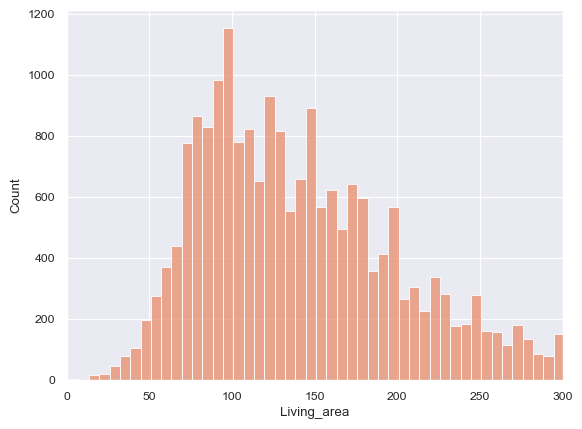

In [196]:
# Plot the outliers.
# Which variables would you delete and why ?
# Represent the number of properties according to their surface using a histogram.
lim = sns.histplot(data=df, x="Living_area")
lim.set_xlim(0,300)
# In your opinion, which 5 variables are the most important and why?
# What are the most expensive municipalities in Belgium? (Average price, median price, price per square meter)
print(df.groupby("provinces")["Price"].mean().sort_values(ascending=False).head())
# What are the most expensive municipalities in Wallonia? (Average price, median price, price per square meter)
# What are the most expensive municipalities in Flanders? (Average price, median price, price per square meter)
# What are the less expensive municipalities in Belgium? (Average price, median price, price per square meter)
# What are the less expensive municipalities in Wallonia? (Average price, median price, price per square meter)
# What are the less expensive municipalities in Flanders? (Average price, median price, price per square meter)

### Work for the first question about gardens
The idea was to find the size of garden per provinces and find the median price of houses with garden by provinces. To see in Which province it's the cheaper to buy a house with a garden


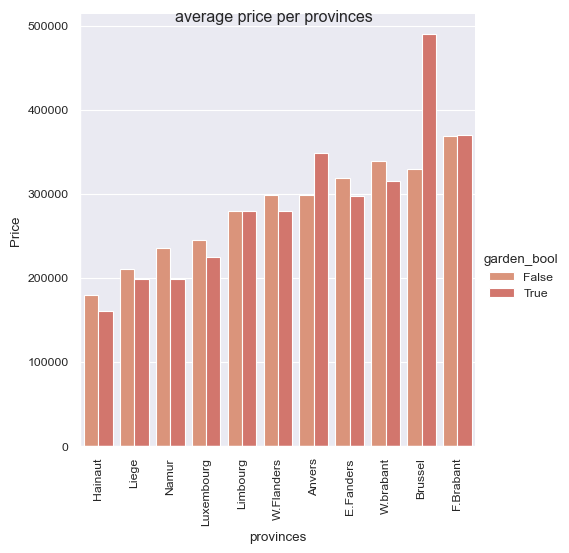

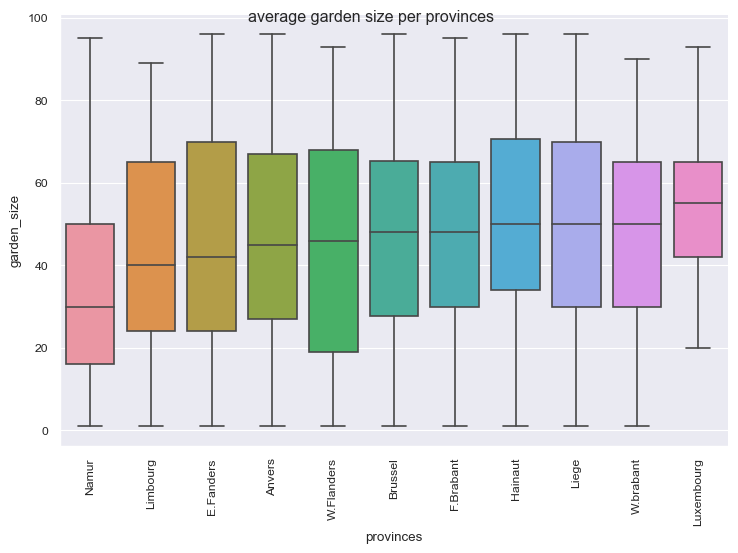

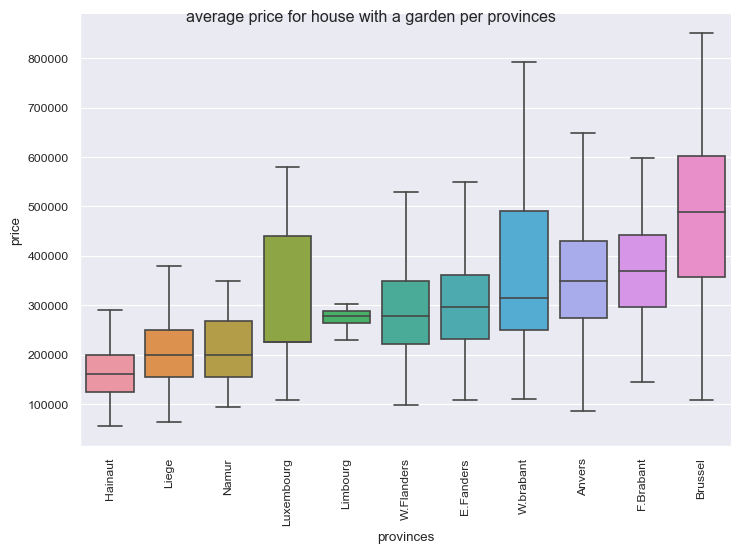

In [197]:
#more general plot for median price per provinces with and without garden
sorte = df.groupby('provinces')["Price"].median().reset_index().sort_values('Price')

test = sns.catplot(data=df,x="provinces",y="Price",hue="garden_bool",
                  kind="bar",errorbar=None,estimator=np.median,
                  order=sorte['provinces'])
#rotation of categories
plt.xticks(rotation=90)
#give a title to the plot
test.fig.suptitle("average price per provinces")

# cleaning the dataframe to have the datas that interests me for my second question 
# what is the median size of a garden in each provinces and for what price is it possible to have one ? 
q2 = pd.DataFrame()
q2['Garden_bool'] = df['garden_bool']
q2['zipcode'] = df['locality']
q2['price'] = df['Price']
q2['provinces'] = df['provinces']
q2['garden_size']= df['garden']

q2['type'] = df['Type_property'] #not sure i will need it but we'll see 
#clean all properties that doesn't have a garden
q2.drop(q2[q2['Garden_bool'] == "False"].index, inplace = True)
#Now we have 7582 row to work with
q2.head()
#creation of a column named provinces
#research of wich postcode are what
pal = sns.color_palette("flare")
sns.set_palette(pal)

#tries to answer my second question
#lines to sort by values and get more readable plots
sort = q2.groupby('provinces')["garden_size"].median().reset_index().sort_values('garden_size')
sort_price = q2.groupby('provinces')["price"].median().reset_index().sort_values('price')
#tries styles for plots
sns.set_style("darkgrid")
sns.set_context('paper')
# plot to know the median size of garden per provinces
ich = sns.catplot(data=q2,x="provinces",y="garden_size",errorbar=None,kind='box',estimator=np.median,order=sort['provinces'],sym="",height=5,aspect=1.5)
plt.xticks(rotation=90)
ich.fig.suptitle("average garden size per provinces")

#plot to knwo the median price of a house <hit a garden per provinces
ich = sns.catplot(data=q2,x="provinces",y="price",errorbar=None,kind='box',estimator=np.median,order=sort_price['provinces'],height=5,aspect=1.5,sym="")
plt.xticks(rotation=90)
ich.fig.suptitle("average price for house with a garden per provinces")

plt.show()


### Work on the second question about castle
I worked with the types of properties, and I wanted to know where to find the cheapest castle to buy in belgium

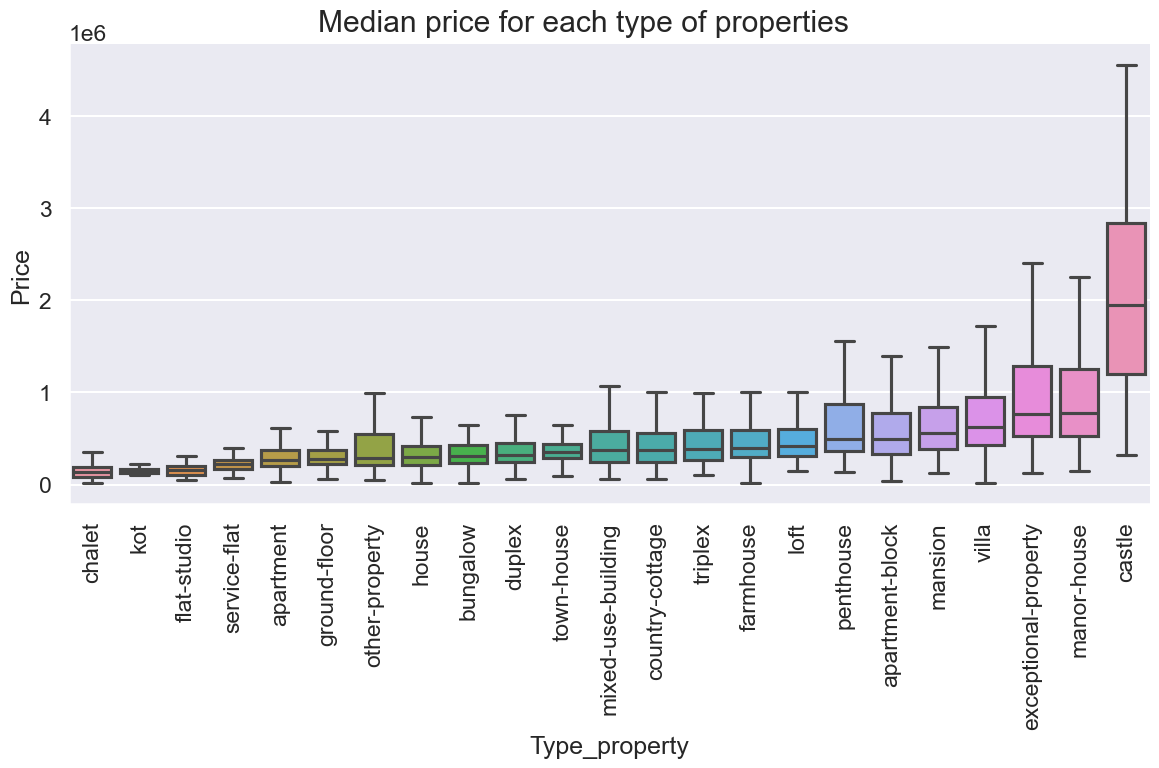

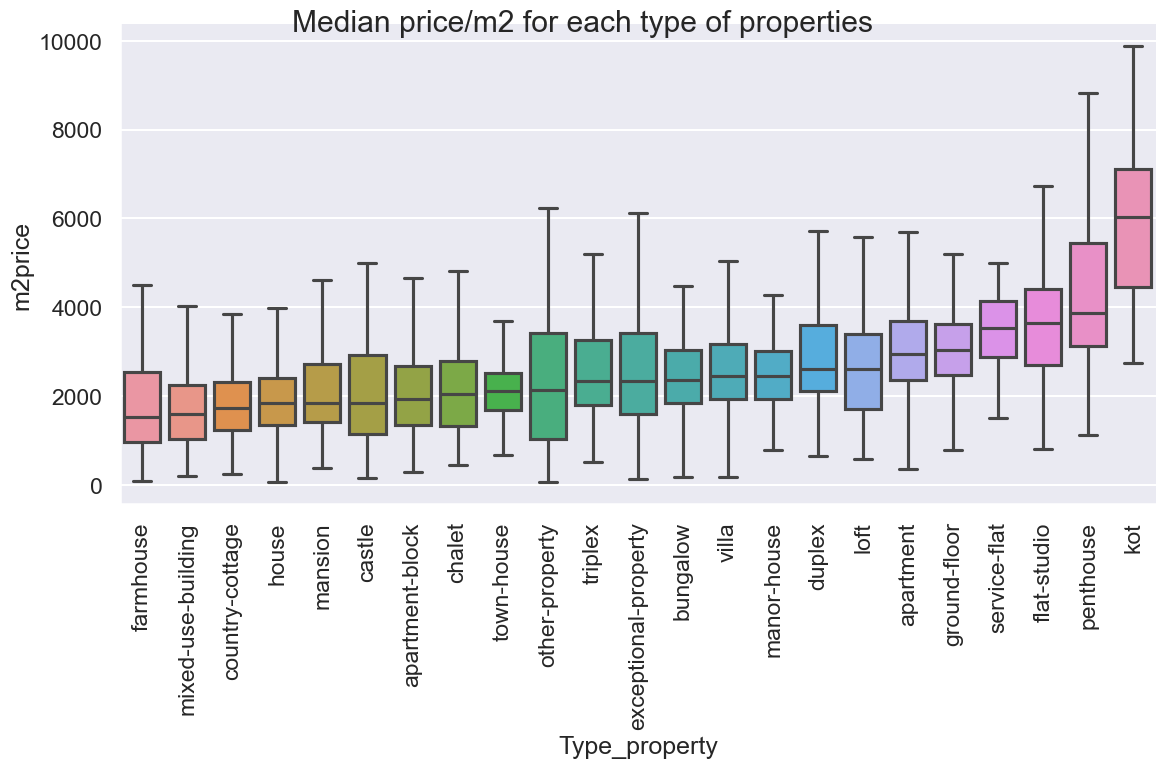

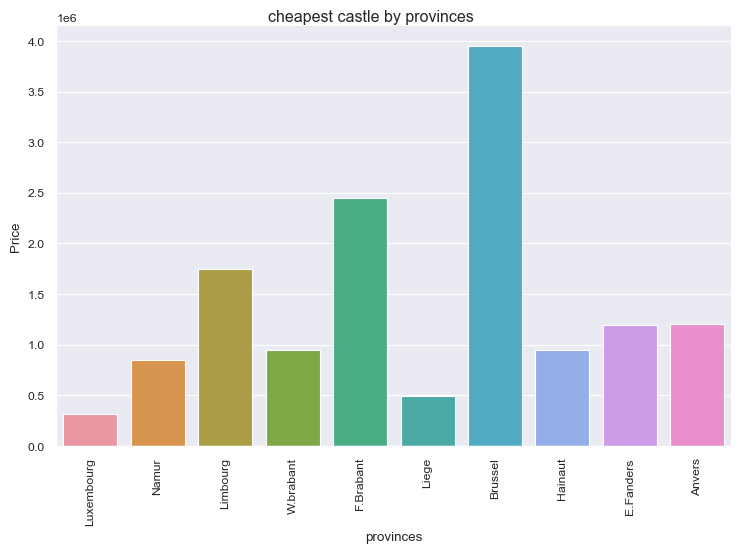

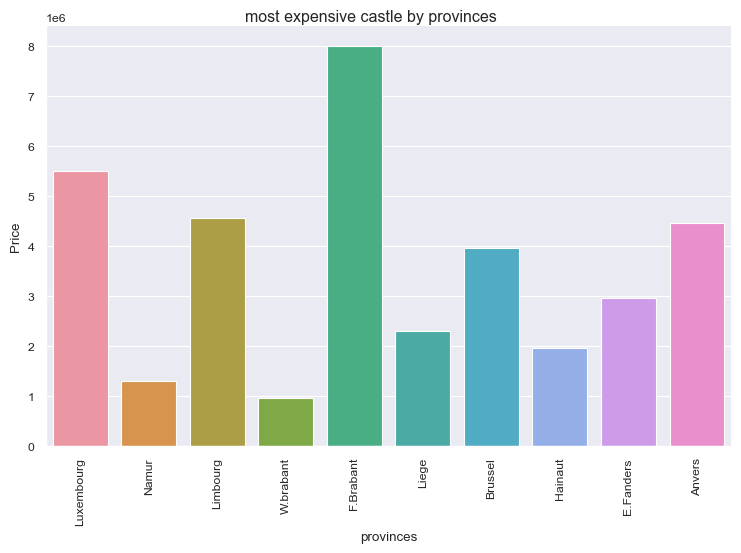

In [201]:
#this is a test to see the different type of properties 
#we sort the order by the median price
sort = d_big.groupby('Type_property')["Price"].median().reset_index().sort_values('Price')
m2 = d_big.groupby('Type_property')["m2price"].median().reset_index().sort_values('m2price')

sns.set_style("darkgrid")
pali = sns.color_palette("flare")
sns.set_context("talk")
sns.set_palette(pali)

ich = sns.catplot(data=d_big,x="Type_property",y="Price",errorbar=None,kind='box',estimator=np.median,order=sort["Type_property"],sym="",height=6,aspect=2)
plt.xticks(rotation=90)
ich.fig.suptitle("Median price for each type of properties")

ich = sns.catplot(data=d_big,x="Type_property",y="m2price",errorbar=None,kind='box',estimator=np.median,order=m2["Type_property"],sym="",height=6,aspect=2)
plt.xticks(rotation=90)
ich.fig.suptitle("Median price/m2 for each type of properties")


#In wich province can I buy the less expensive castle ? 
#creating a special dataframe for the castles
castle = d_big.loc[d_big['Type_property'] == 'castle']
castle.groupby('provinces')['Price'].min()
#using this to sort by values
m1 = castle.groupby('provinces')["m2price"].median().reset_index().sort_values('m2price')
sns.set_context("paper")

#plotting the answers to my question
ich = sns.catplot(data=castle,x="provinces",y="Price",errorbar=None,kind='bar',estimator=np.min, height=5,aspect=1.5)
plt.xticks(rotation=90)
ich.fig.suptitle("cheapest castle by provinces")

ich = sns.catplot(data=castle,x="provinces",y="Price",errorbar=None,kind='bar',estimator=np.max,height=5,aspect=1.5)
plt.xticks(rotation=90)
ich.fig.suptitle("most expensive castle by provinces")
# gave ideas for lots of plots
plt.show()


### Some other relevant plots that I found during my explorations


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Luxembourg'),
  Text(1, 0, 'W.brabant'),
  Text(2, 0, 'Namur'),
  Text(3, 0, 'Limbourg'),
  Text(4, 0, 'F.Brabant'),
  Text(5, 0, 'Liege'),
  Text(6, 0, 'Brussel'),
  Text(7, 0, 'Hainaut'),
  Text(8, 0, 'E.Fanders'),
  Text(9, 0, 'Anvers'),
  Text(10, 0, 'W.Flanders')])

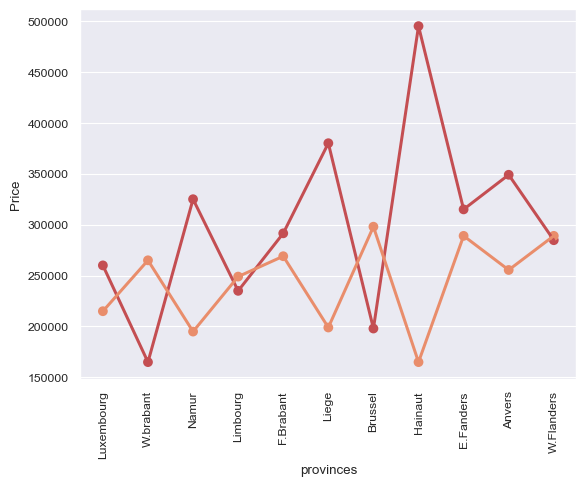

In [200]:

#comparing price between appartement and houses in each province

house = df.loc[df['Type_property'] == 'house']
apartement = df.loc[df['Type_property'] == 'apartment']

ax = plt.subplot()
ax = sns.pointplot(data=house,x="provinces",y="Price",errorbar=None,estimator=np.median, color='r')
plt.xticks(rotation=90)
#ich.fig.suptitle("median price of house by provinces")

ax = sns.pointplot(data=apartement,x="provinces",y="Price",errorbar=None,estimator=np.median)
plt.xticks(rotation=90)
#ich.fig.suptitle("median price of house by provinces")

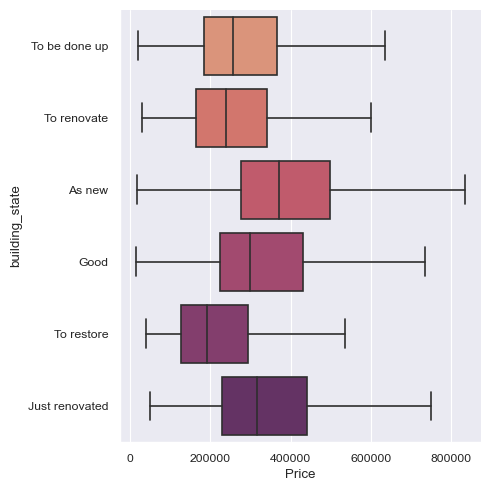

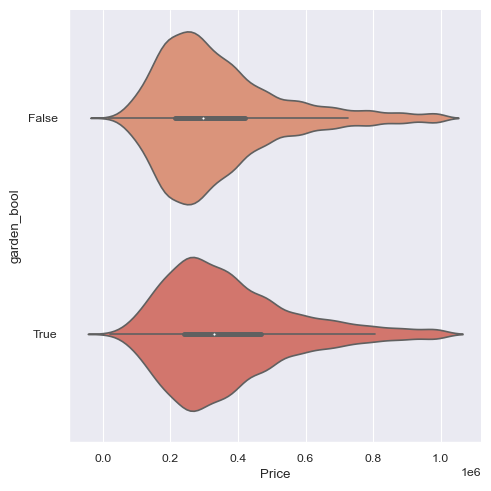

In [110]:
#some interesting plot code with exploration of the state of the building
sns.catplot(data=d_big, x="Price", y="building_state", kind="box",sym="")
sns.catplot(data=d_big, x='Price', y='garden_bool', kind="violin")